<div style="font-size:38px;color:green"><u>Human Voice classifier</u></div><br/><br/>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing data
def bytes_from_file(filename, chunksize=8192):
    with open(filename, "rb") as f:
        while True:
            chunk = f.read(chunksize)
            if chunk:
                for b in chunk:
                    yield b
            else:
                break


datArr1 = np.array([x for x in bytes_from_file('anuragD30.raw')])
datArr2 = np.array([x for x in bytes_from_file('anupamD30.raw')])

datArr = np.concatenate((datArr1,datArr2))

datArr = datArr.reshape((datArr.size//882,882),order = 'C')
datY = np.concatenate((np.zeros((1500),dtype = int),np.ones((1500),dtype = int)))
x = pd.DataFrame(datArr)
y = pd.DataFrame(datY)

In [18]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
import keras
from keras.models import Sequential
from keras.layers import Dense

# initializing ANN
classifier = Sequential()
# adding input and hidden layers
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 882))  # first hidded layer
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))  # second hidded layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))  # output layer
# compiling ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=882, units=80, kernel_initializer="uniform")`
  app.launch_new_instance()
e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


In [19]:
classifier.fit(x_train, y_train, batch_size = 100, epochs = 100)

Epoch 1/100
2700/2700 [==============================] - 1s 386us/step - loss: 0.5695 - acc: 0.7570
Epoch 2/100
2700/2700 [==============================] - 0s 52us/step - loss: 0.2636 - acc: 0.9167
Epoch 3/100
2700/2700 [==============================] - 0s 52us/step - loss: 0.1956 - acc: 0.9419
Epoch 4/100
2700/2700 [==============================] - 0s 53us/step - loss: 0.1710 - acc: 0.9530
Epoch 5/100
2700/2700 [==============================] - 0s 56us/step - loss: 0.1506 - acc: 0.9611
Epoch 6/100
2700/2700 [==============================] - 0s 54us/step - loss: 0.1312 - acc: 0.9659
Epoch 7/100
2700/2700 [==============================] - 0s 54us/step - loss: 0.1229 - acc: 0.9685
Epoch 8/100
2700/2700 [==============================] - 0s 52us/step - loss: 0.1105 - acc: 0.9741
Epoch 9/100
2700/2700 [==============================] - 0s 52us/step - loss: 0.1016 - acc: 0.9759
Epoch 10/100
2700/2700 [==============================] - 0s 54us/step - loss: 0.0918 - acc: 0.9774
Epoch 11

2700/2700 [==============================] - 0s 57us/step - loss: 0.1055 - acc: 0.9785
Epoch 83/100
2700/2700 [==============================] - 0s 53us/step - loss: 0.0735 - acc: 0.9822
Epoch 84/100
2700/2700 [==============================] - 0s 54us/step - loss: 0.0507 - acc: 0.9859
Epoch 85/100
2700/2700 [==============================] - 0s 55us/step - loss: 0.0171 - acc: 0.9944
Epoch 86/100
2700/2700 [==============================] - 0s 52us/step - loss: 0.0118 - acc: 0.9974
Epoch 87/100
2700/2700 [==============================] - 0s 52us/step - loss: 0.0106 - acc: 0.9963
Epoch 88/100
2700/2700 [==============================] - 0s 53us/step - loss: 0.0091 - acc: 0.9981
Epoch 89/100
2700/2700 [==============================] - 0s 55us/step - loss: 0.0085 - acc: 0.9974
Epoch 90/100
2700/2700 [==============================] - 0s 55us/step - loss: 0.0075 - acc: 0.9985
Epoch 91/100
2700/2700 [==============================] - 0s 63us/step - loss: 0.0065 - acc: 0.9989
Epoch 92/100


In [20]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[163,   4],
       [  6, 127]], dtype=int64)

18 1482


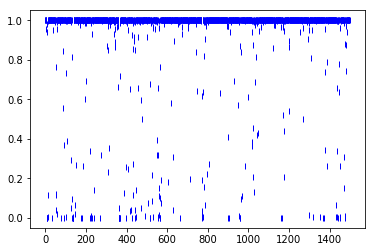

In [29]:
zxc = np.array([x for x in bytes_from_file('y.raw')])
asd = zxc.reshape((zxc.size//882,882),order = 'C')
qwe = pd.DataFrame(asd)
qwe = sc.transform(qwe)
y_asd = classifier.predict(qwe)
sum1 = 0
sum0 = 0
y_ASD = (y_asd>0.5)
# print(y_ASD)
for i in y_asd:
    if(i == False):
        sum0+=1
    else:
        sum1+=1
print(sum0,sum1)

plt.plot(y_asd,"|b")
plt.show()